# Part 6 - [Gradients](https://en.wikipedia.org/wiki/Image_gradient)

- An image gradient is a directional change in the intensity or color in an image.

![Gradient Example](https://i.stack.imgur.com/zRaIN.png)

- In this notebook, we will mainly be exploring basic [`Sobel-Feldman Operators`](https://en.wikipedia.org/wiki/Sobel_operator) (often called `Sobel` for short).
- later we will expand on this operator for general edge detection.
- Gradients can be calculated in a specific direction.

![Cat Image Gradient](https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Intensity_image_with_gradient_images.png/585px-Intensity_image_with_gradient_images.png)

- The operator uses two 3x3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes and one for vertical.

$G_x = \begin{bmatrix} +1 & 0 & -1 \\ +2 & 0 & -2 \\ +1 & 0 & -1 \end{bmatrix} * A$

and

$G_y = \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} * A$

- Check out the wikipedia article on the Sobel Operator for full math details.
- For our use case, we will focus on understanding the syntax of using Sobel with OpenCV.

In [1]:
# import custom method from the parent directory
import os
import sys

current_dir = os.path.abspath("")
parent_dir  = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from utilities import show_img

# regular imports
import numpy as np
import cv2

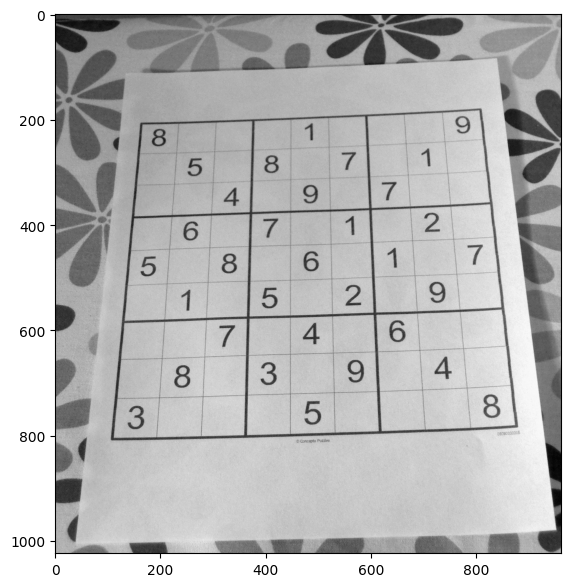

In [2]:
img = cv2.imread("../DATA/sudoku.jpg", cv2.IMREAD_GRAYSCALE)

show_img(img, figsize = (7, 7))

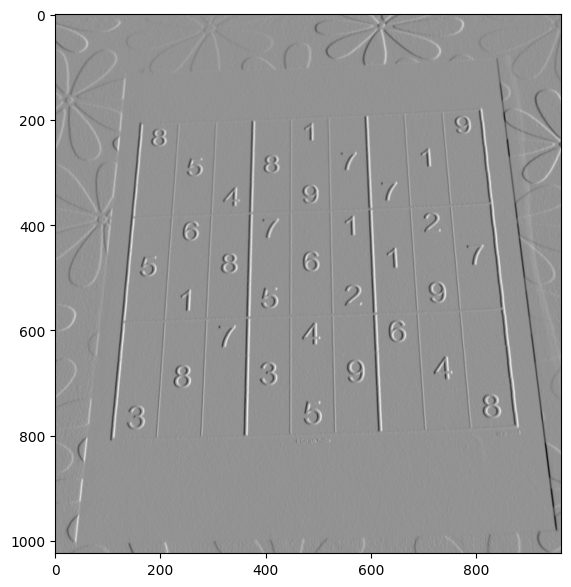

In [3]:
sobelx = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

show_img(sobelx, figsize = (7, 7))

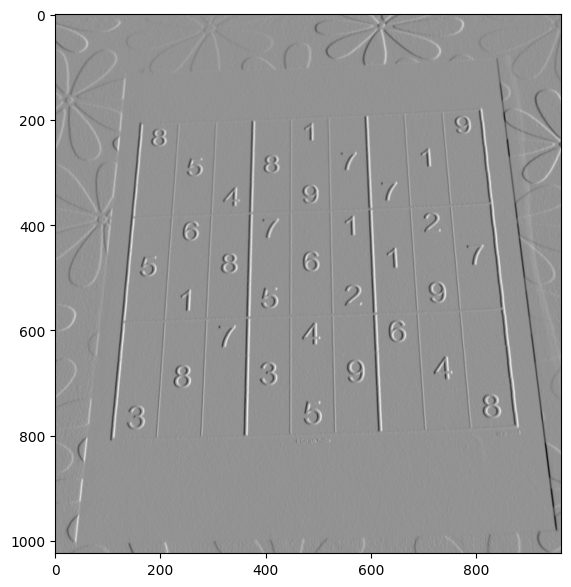

In [4]:
sobely = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

show_img(sobelx, figsize = (7, 7))

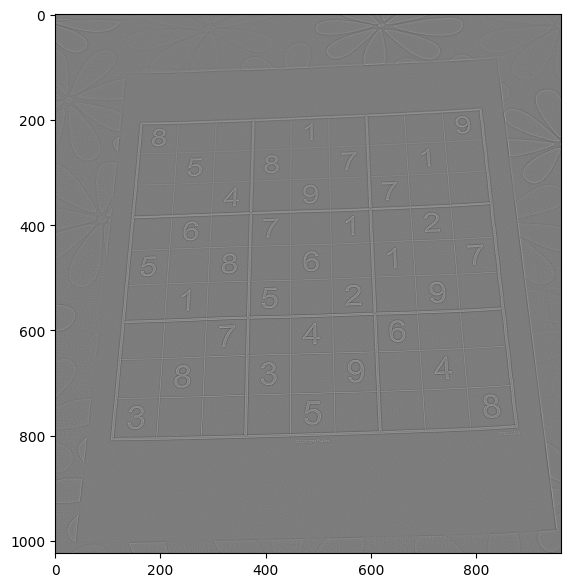

In [5]:
laplacian = cv2.Laplacian(img, ddepth=cv2.CV_64F)

show_img(laplacian, figsize = (7, 7))

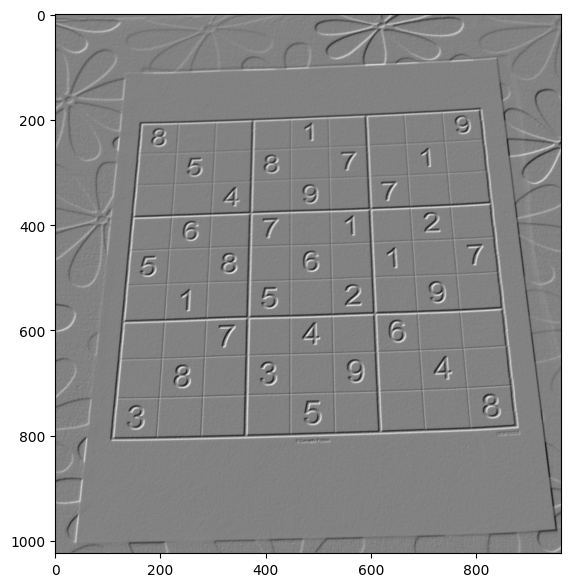

In [6]:
blended = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5, gamma=0)

show_img(blended, figsize = (7, 7))

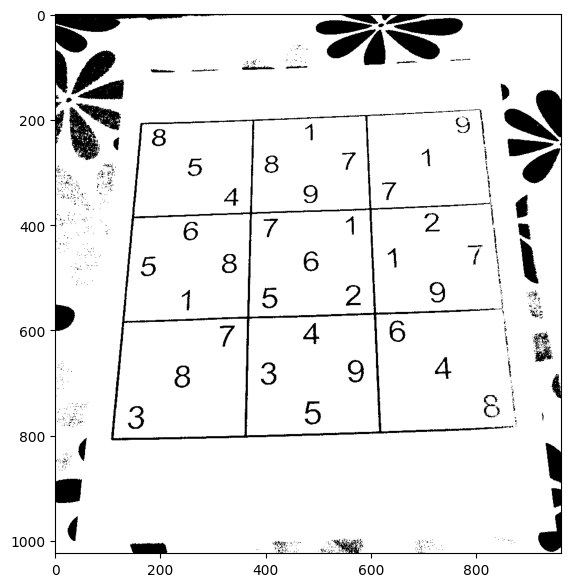

In [7]:
ret, th1 = cv2.threshold(img, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

show_img(th1, figsize = (7, 7))

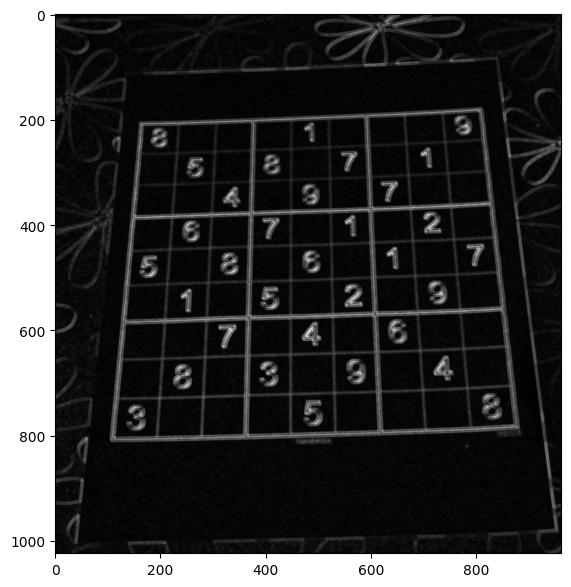

In [8]:
kernel = np.ones((4, 4), dtype=np.uint8)

gradient = cv2.morphologyEx(blended, op=cv2.MORPH_GRADIENT, kernel=kernel)

show_img(gradient, figsize = (7, 7))